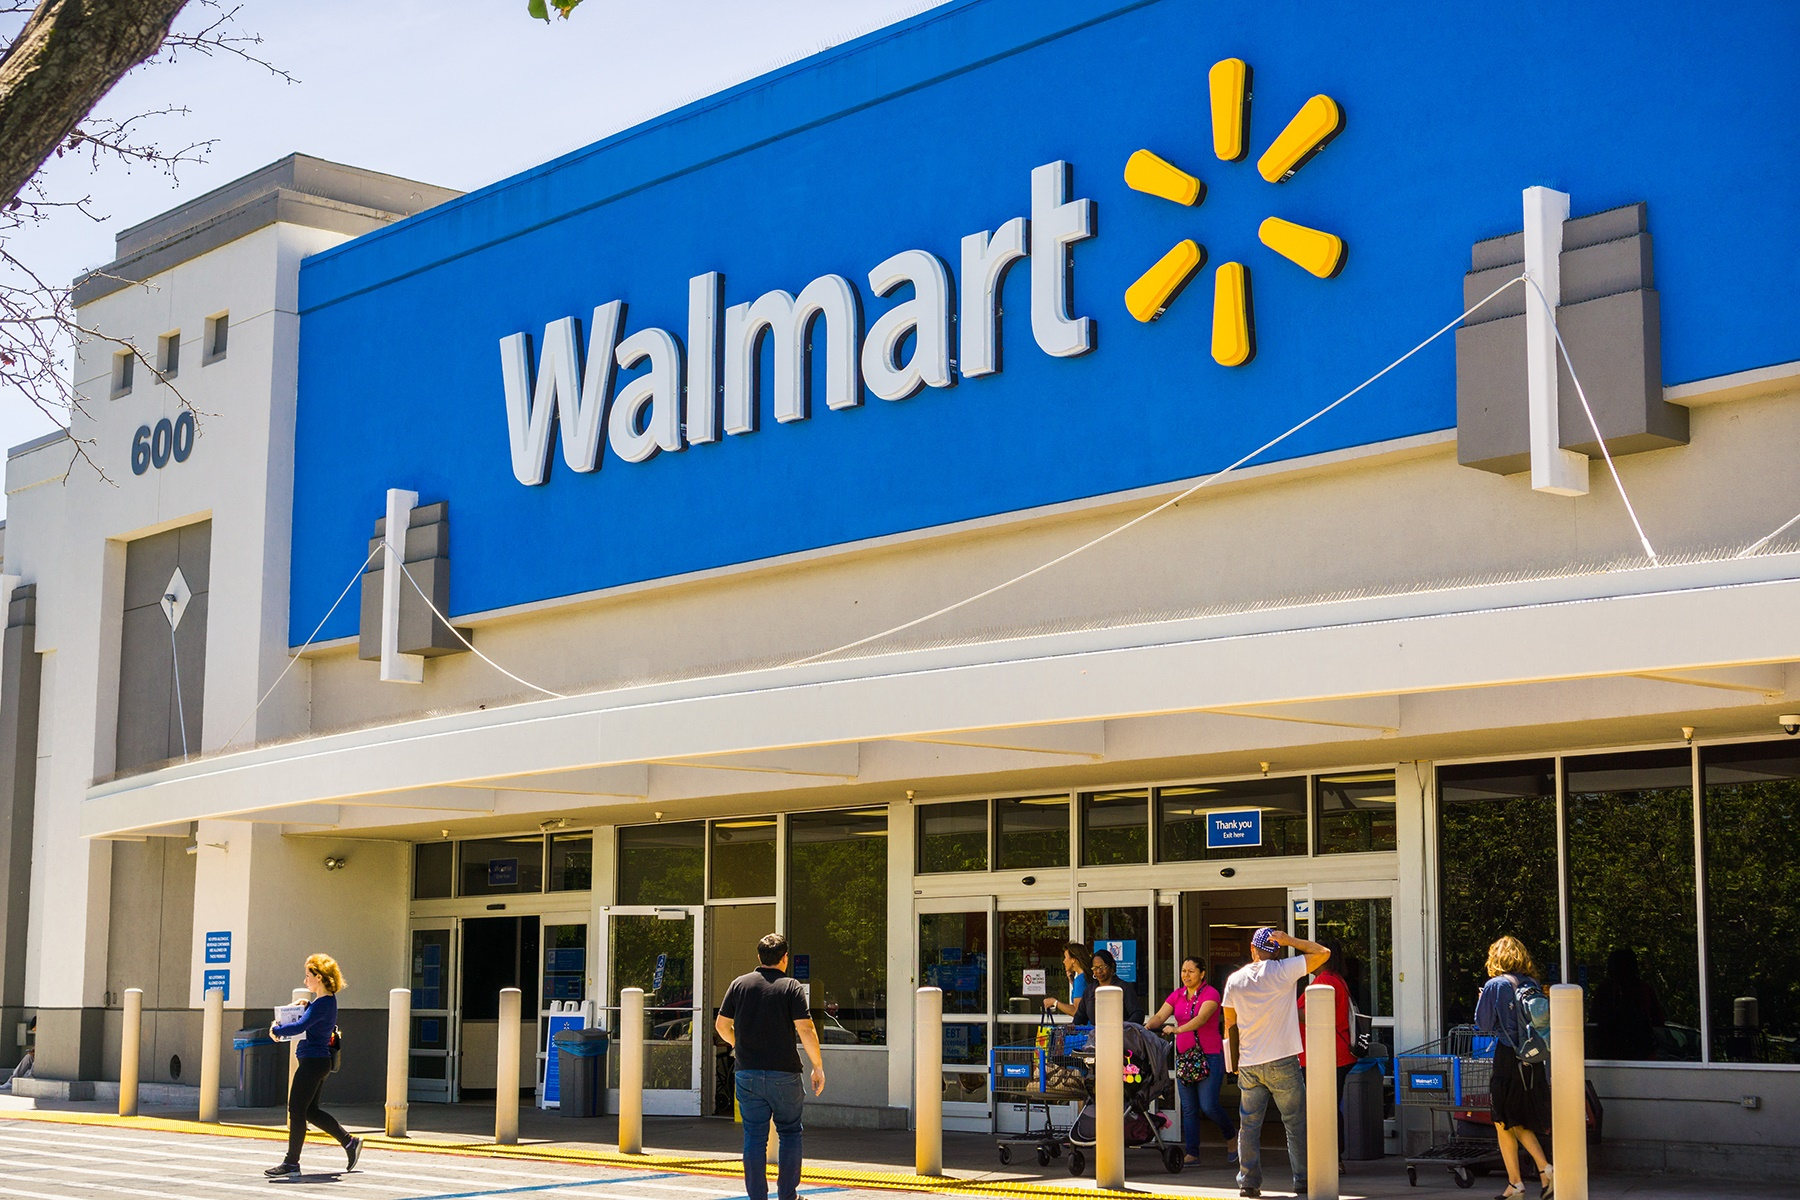

### Loading The libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv('walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


###### To check data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

##### To check duplicates in Dataframe

In [6]:
data.duplicated().sum()

0

#### Feature engineering column for adding order year , month and weekdays

In [7]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Weekday'] = data.Date.dt.weekday

In [8]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0


In [9]:
data.Weekday = data.Weekday.replace( {0: 'Sunday' , 1:'Monday' , 2:'Tuesday' , 3:'Wednesday', 4: 'Thursday' , 5: 'Friday', 6:'Saturday'})
data['Month_Names'] = data.Month.replace( {1:'January' ,\
                                  2: 'February',
                                  3:'March',
                                  4: 'April',
                                  5: 'May',
                                  6:'June',
                                  7:'July',
                                  8:'August',
                                  9:'Spetember',
                                  10:'October',
                                  11:'November',
                                  12:'December'})

#### UNIVARIATE ANALYSIS

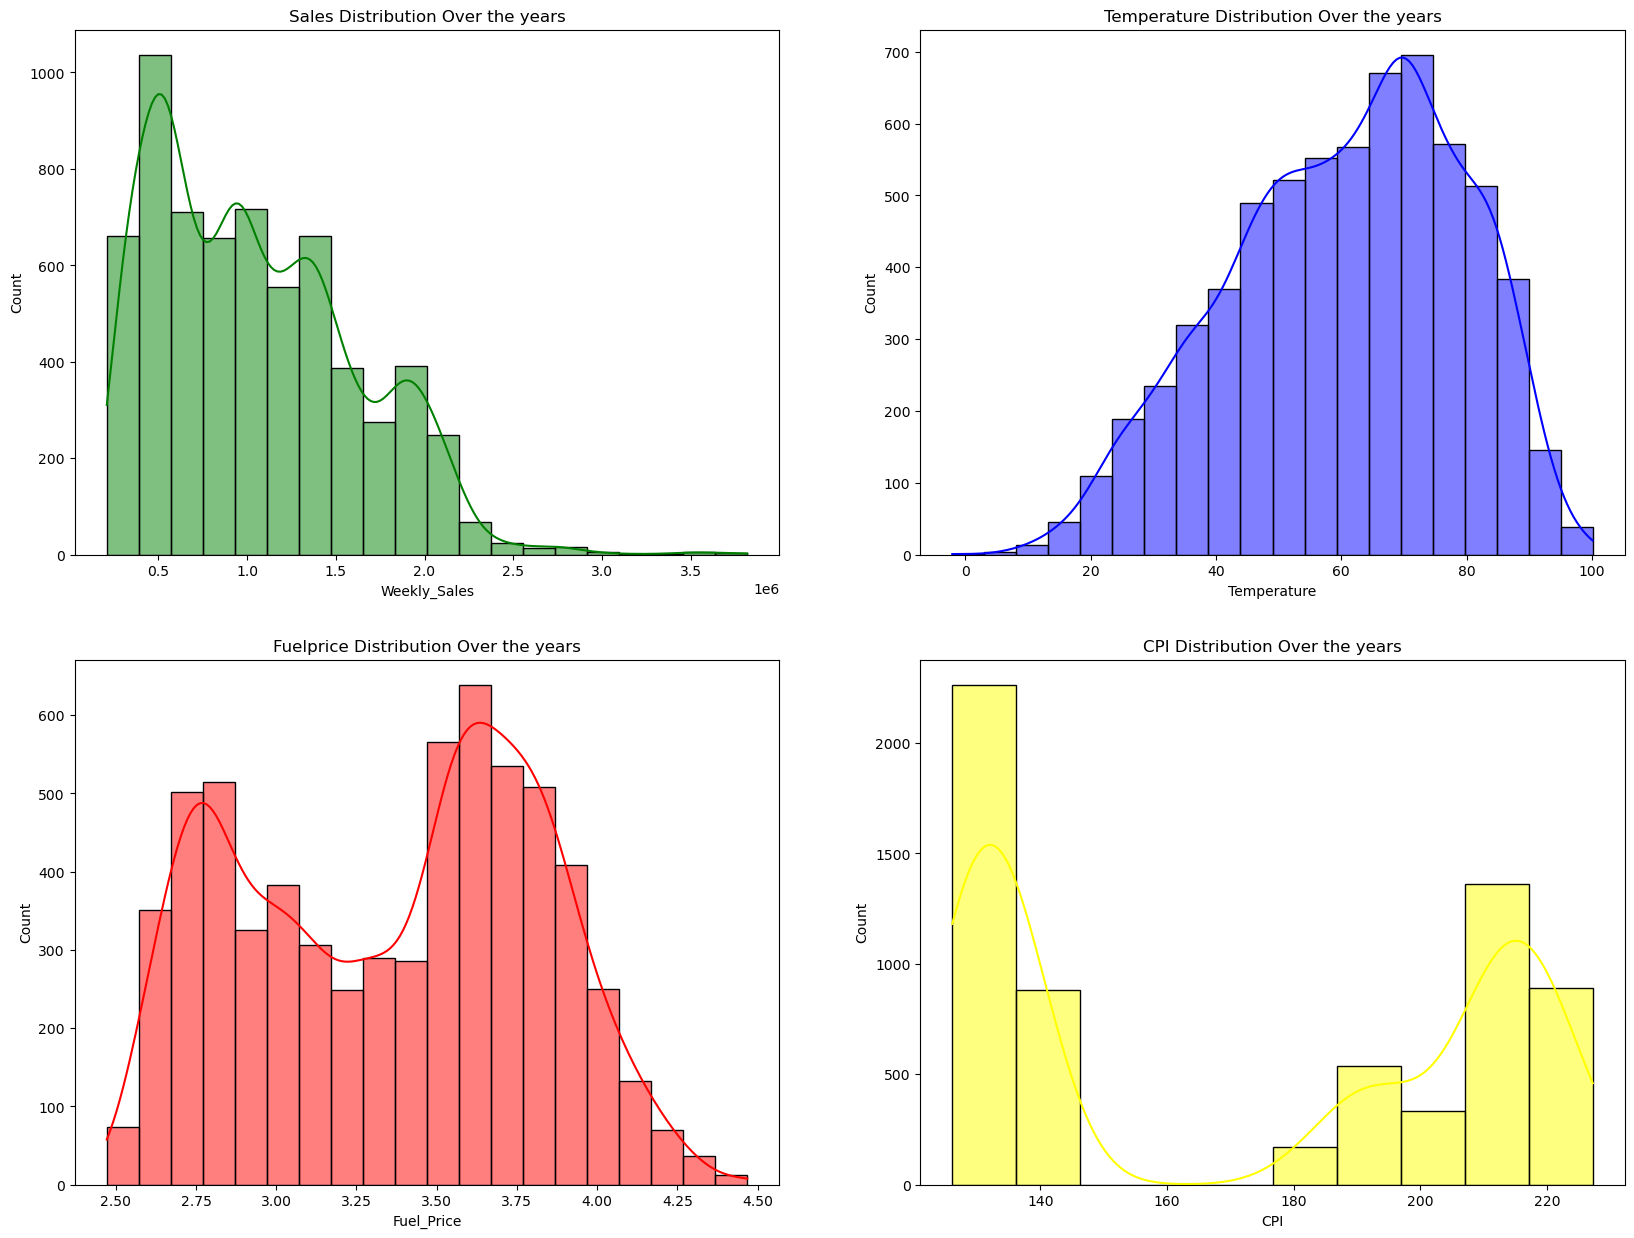

In [10]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.histplot( data = data , x = 'Weekly_Sales' , bins = 20 , kde = True , color ='green')
plt.title('Sales Distribution Over the years')

plt.subplot(2,2,2)
sns.histplot( data= data , x ='Temperature' , bins =20 , kde = True  ,color ='blue')
plt.title('Temperature Distribution Over the years')

plt.subplot(2,2,3)
sns.histplot( data=  data , x ='Fuel_Price', bins =20 , kde =True , color ='red')
plt.title('Fuelprice Distribution Over the years')

plt.subplot(2,2,4)
sns.histplot( data=  data , x ='CPI', bins =10 , kde =True , color ='yellow')
plt.title('CPI Distribution Over the years')
plt.show()

##### <center>  Only Temperature shows Normal Distribution

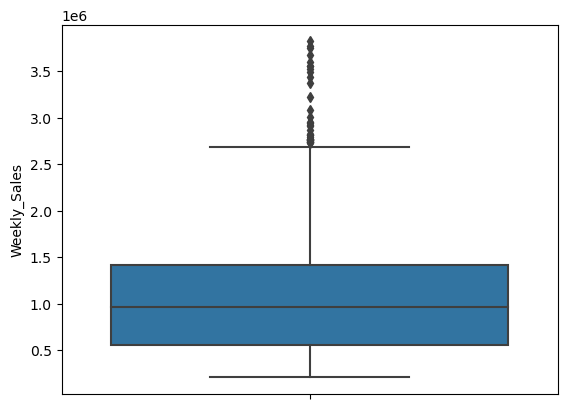

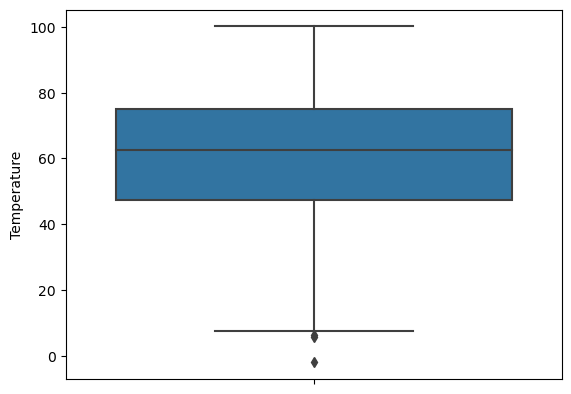

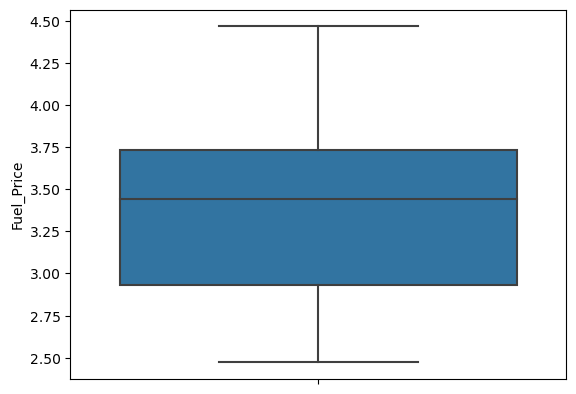

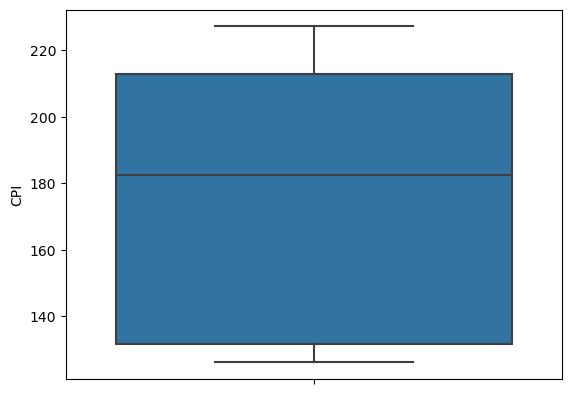

In [11]:
list_plot = ['Weekly_Sales', 'Temperature', 'Fuel_Price','CPI' ]
for i in list_plot:
    sns.boxplot( data = data, y = data[i])
    plt.show()

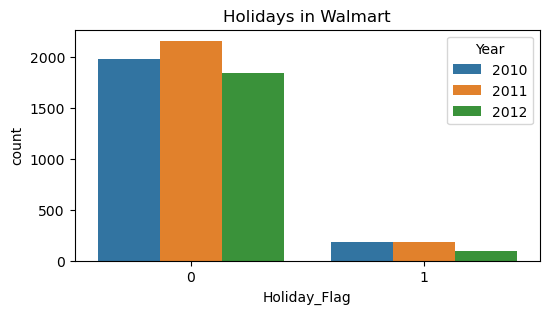

In [12]:
plt.figure( figsize=(6,3))
sns.countplot( data = data , x ='Holiday_Flag' , hue = 'Year')
plt.title('Holidays in Walmart')
plt.show()

<b>Most number of holidays were in 2011 and least number  of holidays were in 2012

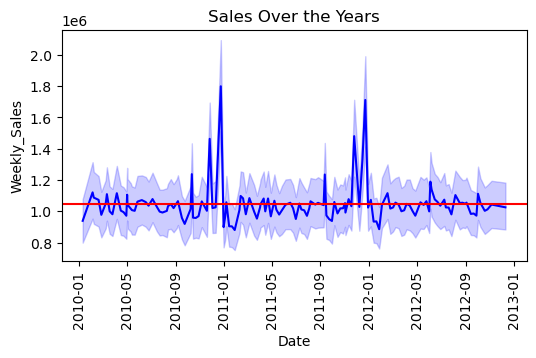

In [13]:
plt.figure( figsize=(6,3))
sns.lineplot ( data = data , x ='Date' , y = 'Weekly_Sales', color ='blue'  )
plt.axhline( y= data.Weekly_Sales.mean() , color ='r')
plt.xticks(rotation = 90)
plt.title( 'Sales Over the Years')
plt.show()

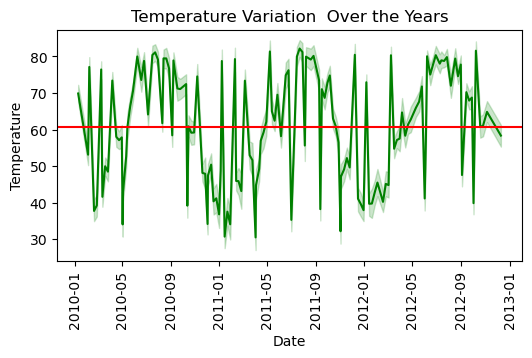

In [14]:
plt.figure( figsize=(6,3))
sns.lineplot ( data = data , x ='Date' , y = 'Temperature', color = 'g'  )
plt.axhline( y = data.Temperature.mean() , color ='r')
plt.xticks(rotation = 90)
plt.title( 'Temperature Variation  Over the Years')
plt.show()

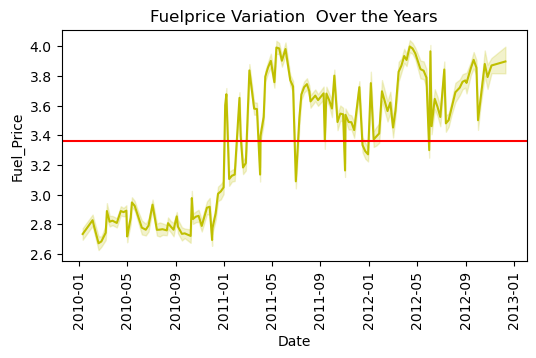

In [15]:
plt.figure( figsize=(6,3))
sns.lineplot ( data = data , x ='Date' , y = 'Fuel_Price', color = 'y'  )
plt.axhline( y = data.Fuel_Price.mean() , color ='r')
plt.xticks(rotation = 90)
plt.title('Fuelprice Variation  Over the Years')
plt.show()

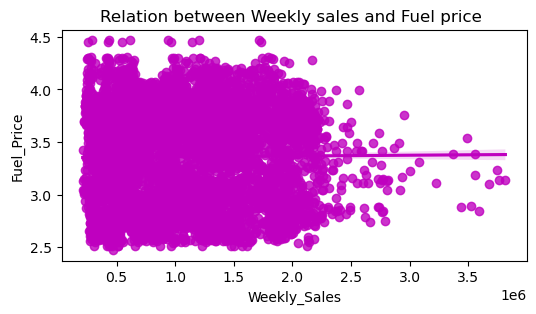

In [16]:
plt.figure( figsize=(6,3))
sns.regplot( data = data , x = 'Weekly_Sales' , y = 'Fuel_Price', color ='m')
plt.title('Relation between Weekly sales and Fuel price ')
plt.show()

 <center> <b> Plot shows zero correlation between Fuelprice and WeeklySales

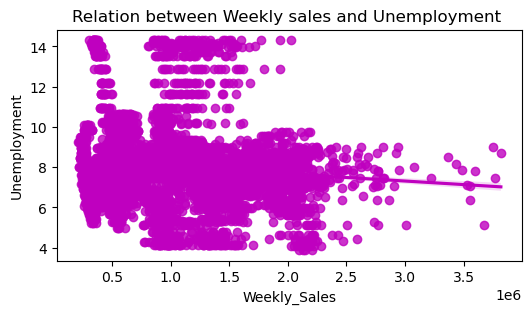

In [17]:
plt.figure( figsize=(6,3))
sns.regplot( data = data , x = 'Weekly_Sales' , y = 'Unemployment', color ='m')
plt.title('Relation between Weekly sales and Unemployment ')
plt.show()

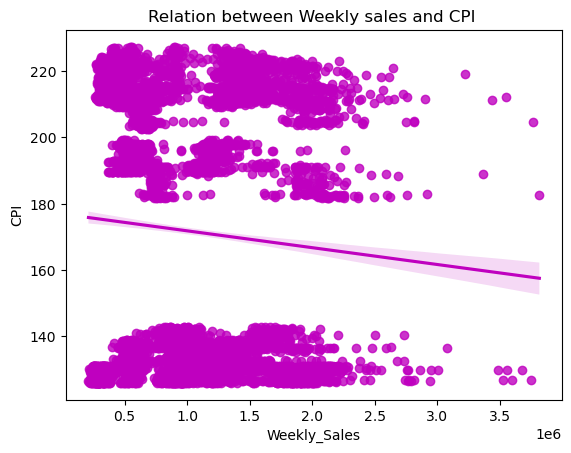

In [18]:
sns.regplot( data = data , x = 'Weekly_Sales' , y = 'CPI', color ='m')
plt.title('Relation between Weekly sales and CPI ')
plt.show()

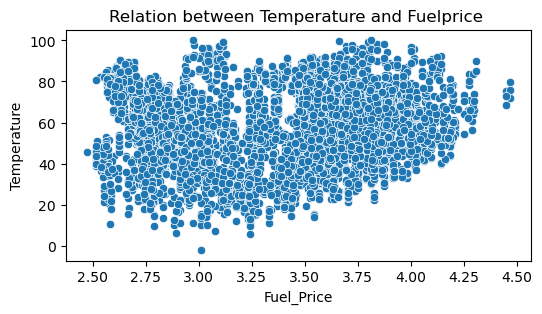

In [19]:
plt.figure( figsize=(6,3))
sns.scatterplot( data = data , x ='Fuel_Price' , y ='Temperature')
plt.title('Relation between Temperature and Fuelprice ')
plt.show()

<b><center> There is no correlation between temperature and Fuelprice

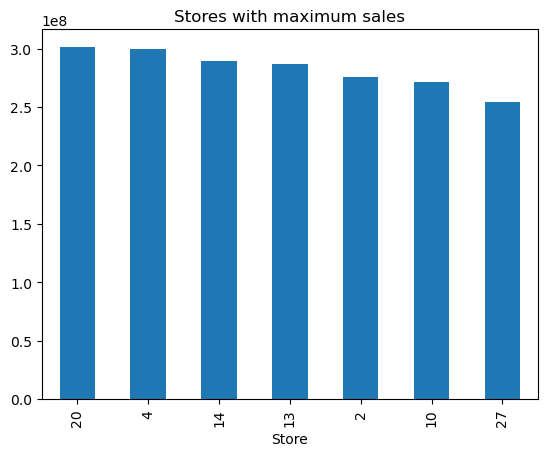

In [20]:

plt.title('Stores with maximum sales')
Storewise_sales = data.groupby(['Store'])['Weekly_Sales'].sum()
Storewise_sales.nlargest(7).plot.bar();


<center><b>Store 20, 4 , 14, 13,2 had highest sales 

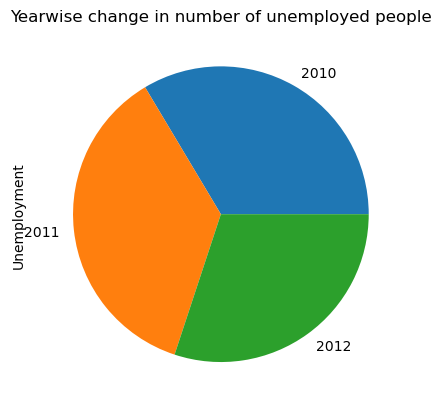

In [21]:
Yearwise_unemployment = data.groupby(['Year'])['Unemployment'].count()
plt.title('Yearwise change in number of unemployed people')
Yearwise_unemployment.plot.pie();

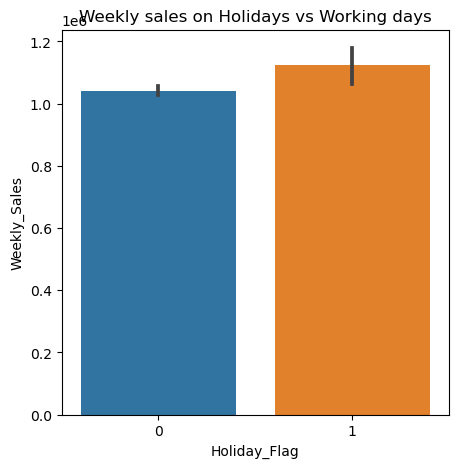

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(data =data , x ='Holiday_Flag' , y ='Weekly_Sales')
plt.title('Weekly sales on Holidays vs Working days')
plt.show()

<b><center> Sales were slightly higher on holidays

In [23]:
def storewise(store):
    sort_store = data[data.Store==store]
    sort_store.drop(columns = 'Store', inplace= True)
    return sort_store

In [24]:
Sales_20 = storewise(20)


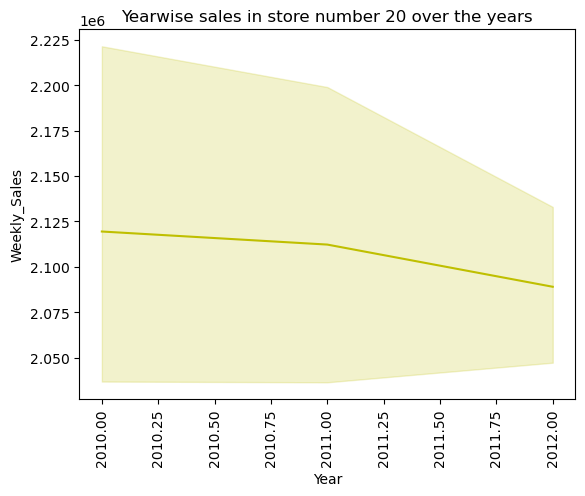

In [25]:
sns.lineplot( data =Sales_20 , x = 'Year' , y = 'Weekly_Sales' , color ='y')
plt.xticks(rotation =90)
plt.title('Yearwise sales in store number 20 over the years')
plt.show()

In [26]:
def yearwise(year):
    sort_year = data[data.Year == year]
    sort_year.drop( columns =['Year','Date'], inplace = True)
    return sort_year

In [27]:
year_2010 = yearwise(2010)
year_2011 = yearwise(2011)
year_2012 = yearwise(2012)

In [28]:
palette_color = sns.color_palette ('YlOrRd_r')

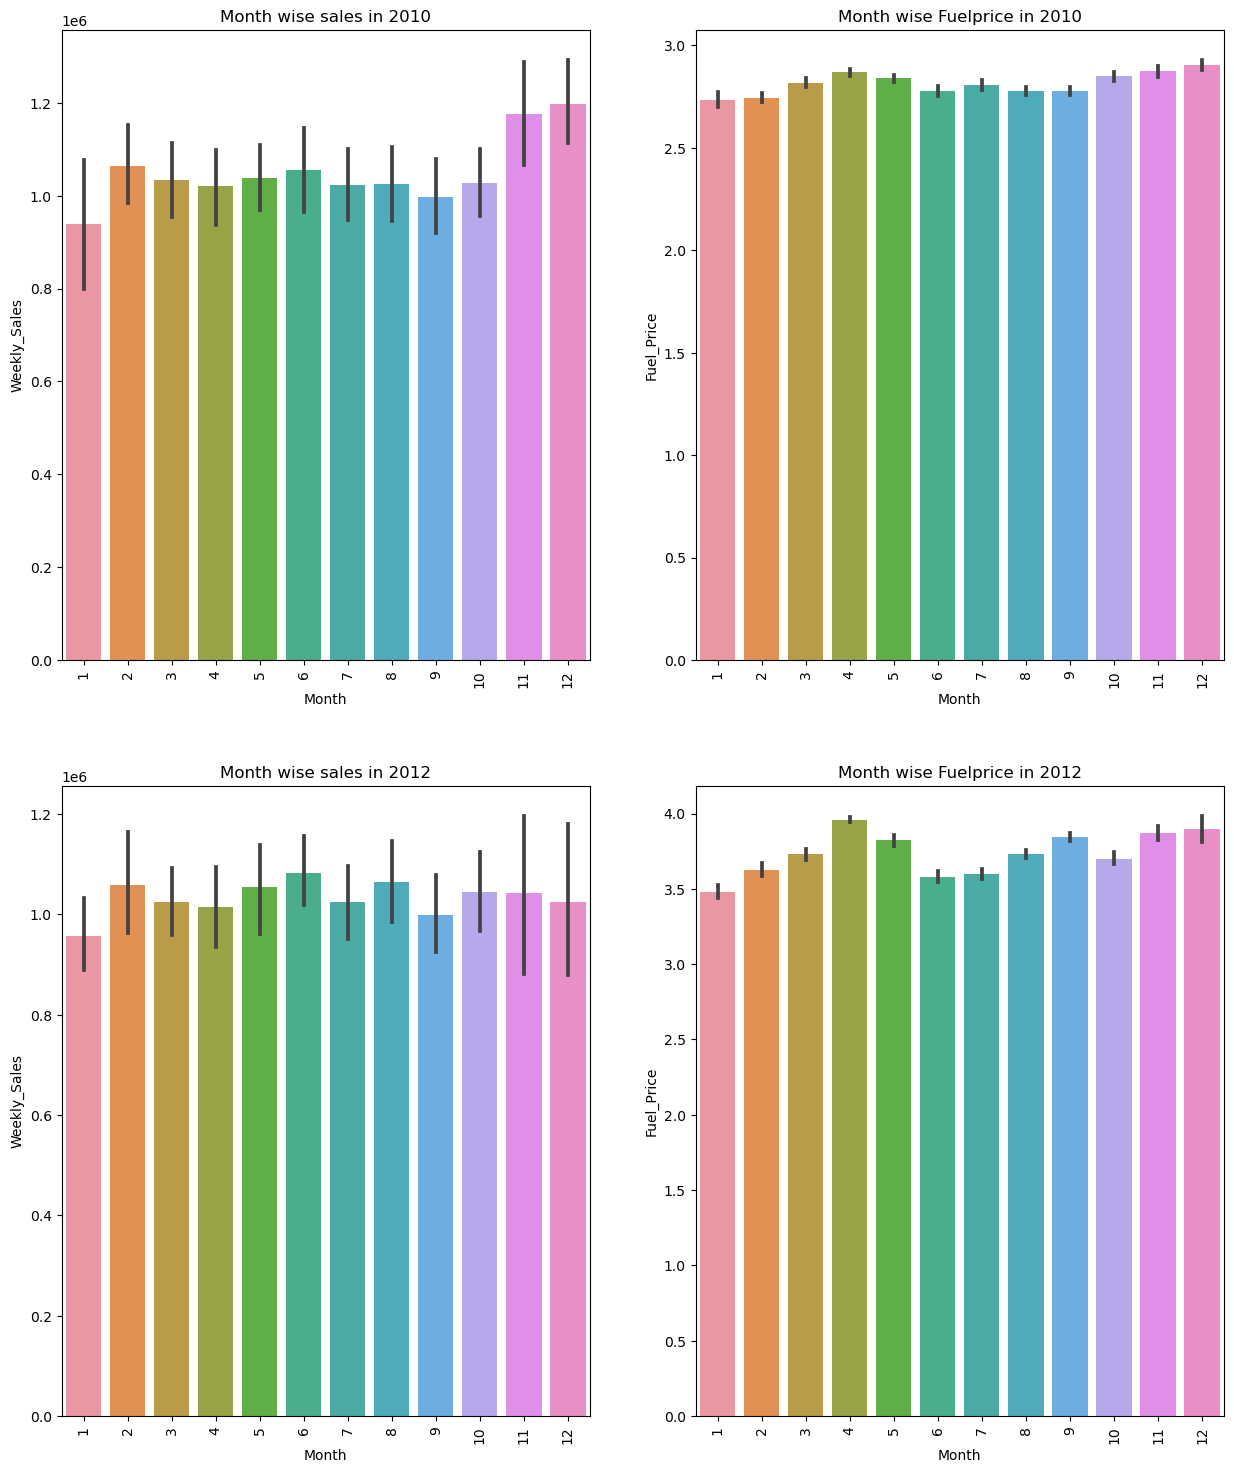

In [29]:
plt.figure(figsize= (15,18))
plt.subplot(2,2,1)
sns.barplot( data = year_2010 , y ='Weekly_Sales' , x ='Month')
plt.xticks(rotation = 90)
plt.title('Month wise sales in 2010')
print()
plt.subplot(2,2,2)
sns.barplot( data = year_2010 , y ='Fuel_Price' , x ='Month')
plt.xticks(rotation =90)
plt.title('Month wise Fuelprice in 2010')

plt.subplot(2,2,3)
sns.barplot( data = year_2012 , y ='Weekly_Sales' , x ='Month')
plt.xticks(rotation = 90)
plt.title('Month wise sales in 2012')

plt.subplot(2,2,4)
sns.barplot( data = year_2012 , y ='Fuel_Price' , x ='Month')
plt.xticks(rotation = 90)
plt.title('Month wise Fuelprice in 2012')

plt.show()

##### Feeature engineering of Celsius column

In [30]:
data['Celsius'] = [(Temp - 32)*(5/9) for Temp in data.Temperature]

In [31]:
data.Celsius.nlargest(2)

4599    37.855556
4707    37.816667
Name: Celsius, dtype: float64

In [32]:
data.Celsius.min()

-18.922222222222224

In [33]:
data['Heat'] = pd.cut( x = data.Celsius , bins = [-20,10,36] ,labels =['cold' ,'warm'])

In [34]:
Monthly_sales = data.groupby(['Month_Names'])['Weekly_Sales'].sum()
Monthly_sales

Month_Names
April        6.453239e+08
August       5.642317e+08
December     5.990761e+08
February     5.220257e+08
January      4.264263e+08
July         5.933139e+08
June         5.750180e+08
March        5.534864e+08
May          6.056966e+08
November     4.591693e+08
October      6.029189e+08
Spetember    5.905323e+08
Name: Weekly_Sales, dtype: float64

In [35]:
Monthly_sales.nlargest(5)

Month_Names
April       6.453239e+08
May         6.056966e+08
October     6.029189e+08
December    5.990761e+08
July        5.933139e+08
Name: Weekly_Sales, dtype: float64

In [36]:
Temp_month = data.groupby(['Weekday' ])['Heat'].count()
Temp_month

Weekday
Friday        270
Monday        405
Saturday      403
Sunday        494
Thursday     4307
Tuesday        89
Wednesday     450
Name: Heat, dtype: int64

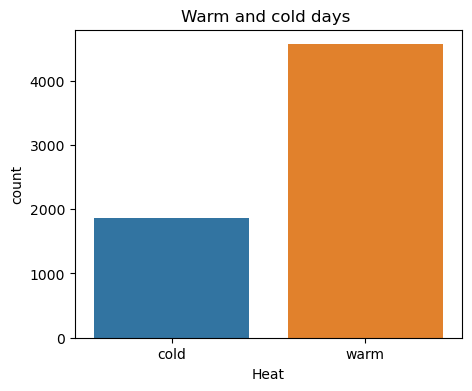

In [37]:
plt.figure(figsize= (5,4))
sns.countplot(data = data , x ='Heat')
plt.title('Warm and cold days ')
plt.show()

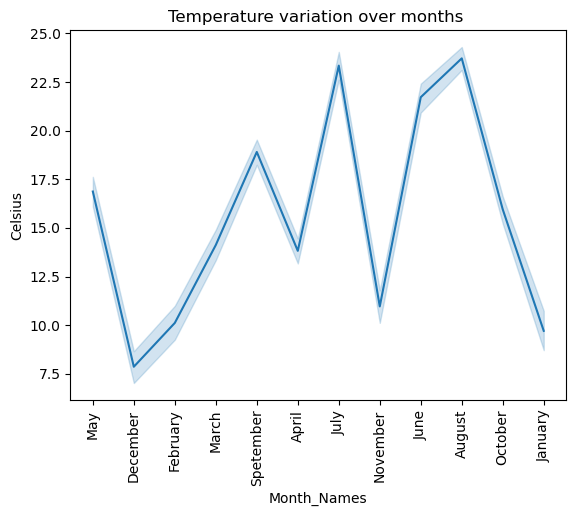

In [38]:
sns.lineplot(data= data , x ='Month_Names' , y ='Celsius')
plt.xticks(rotation =90)
plt.title('Temperature variation over months ')
plt.show()

In [39]:
Monthly_sales = pd.pivot_table(data = data ,values = 'Weekly_Sales' , index= 'Month' , columns ='Year')
Monthly_sales

Year,2010,2011,2012
Month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06
6,1.055082e+06,1.038471e+06,1.082920e+06
7,1.023702e+06,9.976049e+05,1.025480e+06
8,1.025212e+06,1.044895e+06,1.064514e+06
9,9.983559e+05,1.026810e+06,9.988663e+05


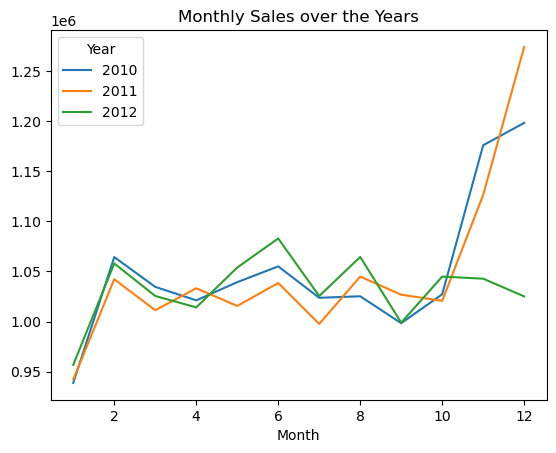

In [40]:
Monthly_sales.plot();
plt.title('Monthly Sales over the Years')
plt.show()

<b><center> Monthly sales recorded maximum in 2011 ,December

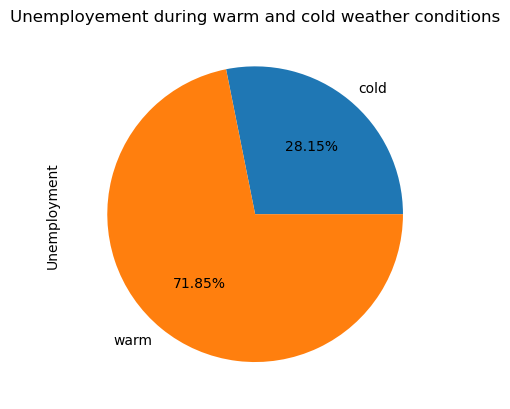

In [41]:
data.groupby(['Heat'])['Unemployment'].sum().plot.pie(autopct = '%1.2f%%')
plt.title('Unemployement during warm and cold weather conditions')
plt.show()

<b><center> Unemployemnt is high when the weather is hot

In [42]:
climate_year = pd.crosstab(data.Year , data.Heat)
climate_year

Heat,cold,warm
Year,,
2010,635,1516
2011,804,1531
2012,416,1516


<b> 2011 had the most number of Cold days

In [43]:
data.Celsius.nlargest()

4599    37.855556
4707    37.816667
4657    37.588889
1597    37.344444
3885    37.344444
Name: Celsius, dtype: float64

In [44]:
data.query(" Celsius> 37.85 ")


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Weekday,Month_Names,Celsius,Heat
4599,33,2010-07-16,280937.84,0,100.14,2.971,126.149806,9.495,2010,7,Thursday,July,37.855556,NaN


<b><center>Highest Temperature was recorded in 2010 ,JULY -37.855556

<b> Factors related to sales

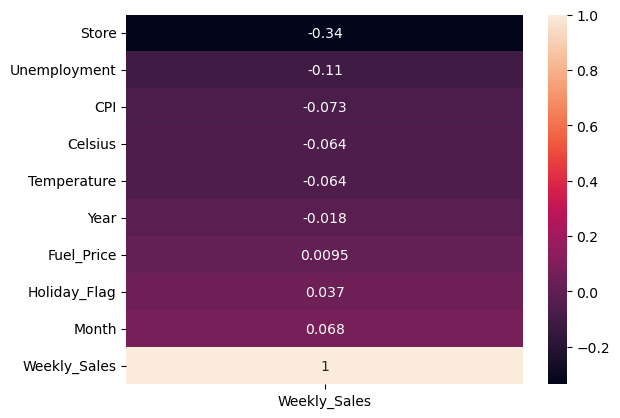

In [45]:
sns.heatmap(data.corr() [['Weekly_Sales']].sort_values(by = 'Weekly_Sales') , annot =True)
plt.show()